---
#**FINAL PROJECT 1 (KELOMPOK 6)**
---

>Nama Anggota :
- Rachma Lingga Maulidya    (PYTN-KS13-024)
- Reza Pramudya Bagaskara   (PYTN-KS13-010)
- Syahrindra Dzaky Ramadhan (PYTN-KS13-014)

---
#**Perkenalan**
---

##**Latar Belakang**

Perkembangan teknologi semakin pesat dan mempengaruhi mobilitas manusia. Manusia melakukan perpindahan dari sutu tempat ke tempat lain dengan menggunakan kendaraan. Dengan adanya perkembangan teknologi hal itu dapat diatasi salah satunya dengan adanya taksi online, dimana customer dapat memesan taksi dengan jenis yang diinginkan secara mudah dan praktis. Namun tingginya permintaan taksi online menyebabkan banyak perusahaan berlomba untuk dapat memberikan pelayanan yang memuaskan.

<br>

Dengan adanya data yang tersimpan, dapat dilakukan prediksi seperti tarif taksi berdasarkan pengaruh - pengaruhya berdasarkan data histori pemesanan. Oleh karena itu kami ingin melakukan prediksi untuk harga pada trensportasi umum taksi online. Kami menggunakan data dari yang diperoleh dari kaggle dengan jenis transportasi umum online Uber dan Lyft. 

##**Dataset**

Dataset _"rideshare_kaggle.csv"_, berisikan informasi tentang kumpulan data transaksi perjalanan taksi dari dua perusahaan berbeda yaitu Uber dan Lyft. Dataset ini terdiri dari 57 _attribute_, namun dari sekian banyak _attribute_ yang ada terdapat 10 yang lebih relevan, dengan total jumlah data 693071 data.


>Dataset yang digunakan pada analisis ini yaitu Uber vs Lyft Dataset yang diunduh dari kaggle melalui link berikut _[rideshare_kaggle](https://www.kaggle.com/datasets/brllrb/uber-and-lyft-dataset-boston-ma)_




##**Attribute Information**
>1. _id_
2. _timestamp_
3. _hour_
4. _day_
5. _month_
6. _datetime_
7. _timezone_
8. _source_: destinasi awal
9. _destination_: destinasi akhir
10. _cab_type_: tipe transportasi (Uber / Lyft)
11. … dan lainnya

##**Project Objectives**

Tujuan utama dari penelitian ini adalah untuk memprediksi harga perjalanan yang paling sesuai dengan mengimplementasikan analisa prediction menggunakan algoritma Linear Regression. Pemilihan algoritma Liniear Regression dikarenakan pada projek ini kita mencoba untuk memprediksi harga perjalanan dengan menggunakan data pada waktu sebelumnya, linear regression mencoba untuk memodelkan hubungan antara variabel dependent dan variabel independent dengan memasang persamaan linear untuk mengamati data. Linear regression berusaha menemukan hubungan matematis antar variabel. konsep linear regression cukup sederhana dan sangat cocok untuk melakukan proses prediksi pada angka seperti harga. Sebelum melakukan proses modeling menggunakan algoritma linear regression, harus dilakukan pemilihan fitur yang tepat. Dikarenakan dataset ini memiliki dimensi yang tinggi dan atribut-atribut yang berkorelasi.

<br>

Final Project 1 ini dibuat guna mengevaluasi konsep Regression sebagai berikut:
- Mampu memahami konsep regression dengan Linear Regression
- Mampu mempersiapkan data untuk digunakan dalam model Linear Regression
- Mampu mengimplementasikan Linear Regression untuk membuat prediksi





---
#**Import Library**
---

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_absolute_percentage_error, r2_score, mean_squared_error, explained_variance_score
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn import neighbors
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor, export_graphviz
from sklearn.metrics import explained_variance_score, mean_squared_error, r2_score


---
##**Data Loading**
---

In [ ]:
from google.colab import drive
drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [ ]:
#Read data
pd.set_option("display.max_columns", None)
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/rideshare_kaggle_1.csv') 
df

,id,timestamp,hour,day,month,datetime,timezone,source,destination,cab_type,product_id,name,price,distance,surge_multiplier,latitude,longitude,temperature,apparentTemperature,short_summary,long_summary,precipIntensity,precipProbability,humidity,windSpeed,windGust,windGustTime,visibility,temperatureHigh,temperatureHighTime,temperatureLow,temperatureLowTime,apparentTemperatureHigh,apparentTemperatureHighTime,apparentTemperatureLow,apparentTemperatureLowTime,icon,dewPoint,pressure,windBearing,cloudCover,uvIndex,visibility.1,ozone,sunriseTime,sunsetTime,moonPhase,precipIntensityMax,uvIndexTime,temperatureMin,temperatureMinTime,temperatureMax,temperatureMaxTime,apparentTemperatureMin,apparentTemperatureMinTime,apparentTemperatureMax,apparentTemperatureMaxTime
0,424553bb-7174-41ea-aeb4-fe06d4f4b9d7,1.544953e+09,9,16,12,2018-12-16 09:30:07,America/New_York,Haymarket Square,North Station,Lyft,lyft_line,Shared,5.0,0.44,1.0,42.2148,-71.0330,42.34,37.12,Mostly Cloudy,Rain throughout the day.,0.0000,0.0,0.68,8.66,9.17,1545015600,10.000,43.68,1544968800,34.19,1545048000,37.95,1544968800,27.39,1545044400,partly-cloudy-night,32.70,1021.98,57,0.72,0,10.000,303.8,1544962084,1544994864,0.30,0.1276,1544979600,39.89,1545012000,43.68,1544968800,33.73,1545012000,38.07,1544958000
1,4bd23055-6827-41c6-b23b-3c491f24e74d,1.543284e+09,2,27,11,2018-11-27 02:00:23,America/New_York,Haymarket Square,North Station,Lyft,lyft_premier,Lux,11.0,0.44,1.0,42.2148,-71.0330,43.58,37.35,Rain,"Rain until morning, starting again in the eve...",0.1299,1.0,0.94,11.98,11.98,1543291200,4.786,47.30,1543251600,42.10,1543298400,43.92,1543251600,36.20,1543291200,rain,41.83,1003.97,90,1.00,0,4.786,291.1,1543232969,1543266992,0.64,0.1300,1543251600,40.49,1543233600,47.30,1543251600,36.20,1543291200,43.92,1543251600
2,981a3613-77af-4620-a42a-0c0866077d1e,1.543367e+09,1,28,11,2018-11-28 01:00:22,America/New_York,Haymarket Square,North Station,Lyft,lyft,Lyft,7.0,0.44,1.0,42.2148,-71.0330,38.33,32.93,Clear,Light rain in the morning.,0.0000,0.0,0.75,7.33,7.33,1543334400,10.000,47.55,1543320000,33.10,1543402800,44.12,1543320000,29.11,1543392000,clear-night,31.10,992.28,240,0.03,0,10.000,315.7,1543319437,1543353364,0.68,0.1064,1543338000,35.36,1543377600,47.55,1543320000,31.04,1543377600,44.12,1543320000
3,c2d88af2-d278-4bfd-a8d0-29ca77cc5512,1.543554e+09,4,30,11,2018-11-30 04:53:02,America/New_York,Haymarket Square,North Station,Lyft,lyft_luxsuv,Lux Black XL,26.0,0.44,1.0,42.2148,-71.0330,34.38,29.63,Clear,Partly cloudy throughout the day.,0.0000,0.0,0.73,5.28,5.28,1543514400,10.000,45.03,1543510800,28.90,1543579200,38.53,1543510800,26.20,1543575600,clear-night,26.64,1013.73,310,0.00,0,10.000,291.1,1543492370,1543526114,0.75,0.0000,1543507200,34.67,1543550400,45.03,1543510800,30.30,1543550400,38.53,1543510800
4,e0126e1f-8ca9-4f2e-82b3-50505a09db9a,1.543463e+09,3,29,11,2018-11-29 03:49:20,America/New_York,Haymarket Square,North Station,Lyft,lyft_plus,Lyft XL,9.0,0.44,1.0,42.2148,-71.0330,37.44,30.88,Partly Cloudy,Mostly cloudy throughout the day.,0.0000,0.0,0.70,9.14,9.14,1543446000,10.000,42.18,1543420800,36.71,1543478400,35.75,1543420800,30.29,1543460400,partly-cloudy-night,28.61,998.36,303,0.44,0,10.000,347.7,1543405904,1543439738,0.72,0.0001,1543420800,33.10,1543402800,42.18,1543420800,29.11,1543392000,35.75,1543420800
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
693066,616d3611-1820-450a-9845-a9ff304a4842,1.543708e+09,23,1,12,2018-12-01 23:53:05,America/New_York,West End,North End,Uber,6f72dfc5-27f1-42e8-84db-ccc7a75f6969,UberXL,13.0,1.00,1.0,42.3519,-71.0643,37.05,37.05,Partly Cloudy,Light rain in the morning and overnight.,0.0000,0.0,0.74,2.34,2.87,1543672800,9.785,44.76,1543690800,34.83,1543712400,44.09,1543690800,35.48,1543712400,partly-cloudy-night,29.65,1023.57,133,0.31,0,9.785,271.5,15436653

In [ ]:
df.shape

(693071, 57)

Dapat dilihat bahwa terdapat 57 atribut dengan 693071 rows.

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 693071 entries, 0 to 693070
Data columns (total 57 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   id                           693071 non-null  object 
 1   timestamp                    693071 non-null  float64
 2   hour                         693071 non-null  int64  
 3   day                          693071 non-null  int64  
 4   month                        693071 non-null  int64  
 5   datetime                     693071 non-null  object 
 6   timezone                     693071 non-null  object 
 7   source                       693071 non-null  object 
 8   destination                  693071 non-null  object 
 9   cab_type                     693071 non-null  object 
 10  product_id                   693071 non-null  object 
 11  name                         693071 non-null  object 
 12  price                        637976 non-null  float64
 13 

Dari hasil diatas dapat dilihat bahwa variabel yang terdapat pada dataset rideshare berjumlah sebanyak 57 variabel, dan memiliki 3 jenis tipe data yang terdiri dari object, float, dan integer.

Dapat dilihat pula bahwa terdapat kekurangan data pada kolom Price.

In [ ]:
#Melihat banyaknya unique value
for col in df.columns:
    print(col,': ', df[col].nunique())

id :  693071
timestamp :  36179
hour :  24
day :  17
month :  2
datetime :  31350
timezone :  1
source :  12
destination :  12
cab_type :  2
product_id :  13
name :  13
price :  147
distance :  549
surge_multiplier :  7
latitude :  11
longitude :  12
temperature :  308
apparentTemperature :  319
short_summary :  9
long_summary :  11
precipIntensity :  63
precipProbability :  29
humidity :  51
windSpeed :  291
windGust :  286
windGustTime :  25
visibility :  227
temperatureHigh :  129
temperatureHighTime :  23
temperatureLow :  133
temperatureLowTime :  31
apparentTemperatureHigh :  124
apparentTemperatureHighTime :  27
apparentTemperatureLow :  136
apparentTemperatureLowTime :  32
icon :  7
dewPoint :  313
pressure :  316
windBearing :  195
cloudCover :  83
uvIndex :  3
visibility.1 :  227
ozone :  274
sunriseTime :  110
sunsetTime :  114
moonPhase :  18
precipIntensityMax :  65
uvIndexTime :  20
temperatureMin :  131
temperatureMinTime :  25
temperatureMax :  128
temperatureMaxTime : 

---
##**Data Cleaning**
---

In [ ]:
#Mengecek jumlah data yang duplikat
df.duplicated().sum()

0

In [ ]:
#Mengecek keberadaan mising value
df.isnull().values.any()

True

Dikarenakan jawabanya adalah True, maka masih terdapat missing value pada data.

In [ ]:
df.isnull().sum()

id                                 0
timestamp                          0
hour                               0
day                                0
month                              0
datetime                           0
timezone                           0
source                             0
destination                        0
cab_type                           0
product_id                         0
name                               0
price                          55095
distance                           0
surge_multiplier                   0
latitude                           0
longitude                          0
temperature                        0
apparentTemperature                0
short_summary                      0
long_summary                       0
precipIntensity                    0
precipProbability                  0
humidity                           0
windSpeed                          0
windGust                           0
windGustTime                       0
v

Dapat dilihat bahwa terdapat missing value hanya pada atribut Price sebanyak 55095 data.

In [ ]:
#Presentase missing value pada kolom price
print('Presentase missing value pada kolom price : ', df['price'].isnull().sum()/df.shape[0] * 100, '%')

Presentase missing value pada kolom price :  7.949402009317949 %


In [ ]:
#remove nilai null atau nan
df = df.dropna()

Menghapus atau melakukan drop pada missing value dikarenakan distribusi value nya terlalu besar sehingga jika dilakukan dengan replace dapat mempengaruhi data. missing value juga memiliki presentasi yang kecil sehingga jika dilakukan penghapusan atau drop tidak berpengaruh terhadap data atau hasil. dan dengan melakukan drop atau menghapus dapat meningkatkan kualitas hasil.

In [ ]:
#Mengecek kembali missing value
df.isnull().values.any()

False

Dikarenakan output False, maka sudah tidak terdapat missing value pada data.

In [ ]:
#cek data terbaru
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 637976 entries, 0 to 693070
Data columns (total 57 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   id                           637976 non-null  object 
 1   timestamp                    637976 non-null  float64
 2   hour                         637976 non-null  int64  
 3   day                          637976 non-null  int64  
 4   month                        637976 non-null  int64  
 5   datetime                     637976 non-null  object 
 6   timezone                     637976 non-null  object 
 7   source                       637976 non-null  object 
 8   destination                  637976 non-null  object 
 9   cab_type                     637976 non-null  object 
 10  product_id                   637976 non-null  object 
 11  name                         637976 non-null  object 
 12  price                        637976 non-null  float64
 13 

dari hasil cleaning data dengan menghapus atau drop missing value tersisa 637976 data.

---
##**Data Exploration**
---

In [ ]:
#Melihat statistik data secara umum
df.describe()

,timestamp,hour,day,month,price,distance,surge_multiplier,latitude,longitude,temperature,apparentTemperature,precipIntensity,precipProbability,humidity,windSpeed,windGust,windGustTime,visibility,temperatureHigh,temperatureHighTime,temperatureLow,temperatureLowTime,apparentTemperatureHigh,apparentTemperatureHighTime,apparentTemperatureLow,apparentTemperatureLowTime,dewPoint,pressure,windBearing,cloudCover,uvIndex,visibility.1,ozone,sunriseTime,sunsetTime,moonPhase,precipIntensityMax,uvIndexTime,temperatureMin,temperatureMinTime,temperatureMax,temperatureMaxTime,apparentTemperatureMin,apparentTemperatureMinTime,apparentTemperatureMax,apparentTemperatureMaxTime
count,6.379760e+05,637976.000000,637976.000000,637976.000000,637976.000000,637976.000000,637976.000000,637976.000000,637976.000000,637976.000000,637976.00000,637976.000000,637976.000000,637976.000000,637976.000000,637976.000000,6.379760e+05,637976.000000,637976.000000,6.379760e+05,637976.000000,6.379760e+05,637976.000000,6.379760e+05,637976.000000,6.379760e+05,637976.000000,637976.000000,637976.000000,637976.000000,637976.000000,637976.000000,637976.000000,6.379760e+05,6.379760e+05,637976.000000,637976.000000,6.379760e+05,637976.000000,6.379760e+05,637976.000000,6.379760e+05,637976.000000,6.379760e+05,637976.000000,6.379760e+05
mean,1.544046e+09,11.618528,17.797674,11.586550,16.545125,2.189261,1.015068,42.338161,-71.066144,39.582406,35.87844,0.008909,0.145941,0.741056,6.186795,8.470616,1.544049e+09,8.469180,45.039586,1.544050e+09,34.148928,1.544102e+09,41.612514,1.544050e+09,30.137973,1.544099e+09,31.652281,1010.092744,220.112705,0.686291,0.249031,8.469180,313.515634,1.544027e+09,1.544060e+09,0.579076,0.037369,1.544044e+09,33.456171,1.544042e+09,45.259945,1.544047e+09,29.729028,1.544048e+09,41.995876,1.544048e+09
std,6.892028e+05,6.948776,9.982083,0.492452,9.324359,1.135413,0.095422,0.047856,0.020303,6.725500,7.91726,0.026880,0.328776,0.138575,3.147856,5.288683,6.928507e+05,2.601828,5.996033,6.938211e+05,6.381731,6.923133e+05,7.665189,6.941980e+05,8.056278,6.927580e+05,9.141390,13.475580,99.087172,0.358599,0.474306,2.601828,27.951377,6.911634e+05,6.906875e+05,0.244674,0.055216,6.912268e+05,6.466349,6.902087e+05,5.644414,6.901597e+05,7.109907,6.872011e+05,6.935538,6.911036e+05
min,1.543204e+09,0.000000,1.000000,11.000000,2.500000,0.020000,1.000000,42.214800,-71.105400,18.910000,12.13000,0.000000,0.000000,0.380000,0.450000,0.800000,1.543151e+09,0.717000,32.680000,1.543154e+09,17.850000,1.543234e+09,22.620000,1.543187e+09,11.810000,1.543234e+09,4.390000,988.090000,2.000000,0.000000,0.000000,0.717000,269.400000,1.543147e+09,1.543181e+09,0.090000,0.000000,1.543162e+09,15.630000,1.543122e+09,33.510000,1.543154e+09,11.810000,1.543136e+09,28.950000,1.543187e+09
25%,1.543444e+09,6.000000,13.000000,11.000000,9.000000,1.270000,1.000000,42.350300,-71.081000,36.450000,31.91000,0.000000,0.000000,0.640000,3.410000,4.060000,1.543432e+09,8.432000,42.570000,1.543439e+09,30.170000,1.543489e+09,36.570000,1.543439e+09,27.700000,1.543478e+09,27.490000,999.820000,124.000000,0.370000,0.000000,8.432000,290.900000,1.543406e+09,1.543440e+09,0.300000,0.000000,1.543421e+09,30.170000,1.543399e+09,42.570000,1.543439e+09,27.760000,1.543399e+09,36.570000,1.543439e+09
50%,1.543737e+09,12.000000,17.000000,12.000000,13.500000,2.160000,1.000000,42.351900,-71.063100,40.490000,35.90000,0.000000,0.000000,0.710000,5.910000,7.550000,1.543756e+09,9.880000,44.660000,1.543788e+09,34.180000,1.543817e+09,40.950000,1.543788e+09,30.030000,1.543817e+09,30.690000,1009.250000,258.000000,0.820000,0.000000,9.880000,307.400000,1.543752e+09,1.543785e+09,0.680000,0.000400,1.543770e+09,34.240000,1.543727e+09,44.660000,1.543788e+09,30.130000,1.543745e+09,40.950000,1.543788e+09
75%,1.544828e+09,18.000000,28.000000,12.000000,22.500000,2.930000,1.000000,42.364700,-71.054200,43.580000,40.01000,0.000000,0.000000,0.880000,8.410000,11.740000,1.544846e+09,9.996000,46.910000,1.544814e+09,38.730000,1.544836e+09,44.120000,1.544818e+09,35.320

In [ ]:
df.head()

,id,timestamp,hour,day,month,datetime,timezone,source,destination,cab_type,product_id,name,price,distance,surge_multiplier,latitude,longitude,temperature,apparentTemperature,short_summary,long_summary,precipIntensity,precipProbability,humidity,windSpeed,windGust,windGustTime,visibility,temperatureHigh,temperatureHighTime,temperatureLow,temperatureLowTime,apparentTemperatureHigh,apparentTemperatureHighTime,apparentTemperatureLow,apparentTemperatureLowTime,icon,dewPoint,pressure,windBearing,cloudCover,uvIndex,visibility.1,ozone,sunriseTime,sunsetTime,moonPhase,precipIntensityMax,uvIndexTime,temperatureMin,temperatureMinTime,temperatureMax,temperatureMaxTime,apparentTemperatureMin,apparentTemperatureMinTime,apparentTemperatureMax,apparentTemperatureMaxTime
0,424553bb-7174-41ea-aeb4-fe06d4f4b9d7,1.544953e+09,9,16,12,2018-12-16 09:30:07,America/New_York,Haymarket Square,North Station,Lyft,lyft_line,Shared,5.0,0.44,1.0,42.2148,-71.033,42.34,37.12,Mostly Cloudy,Rain throughout the day.,0.0000,0.0,0.68,8.66,9.17,1545015600,10.000,43.68,1544968800,34.19,1545048000,37.95,1544968800,27.39,1545044400,partly-cloudy-night,32.70,1021.98,57,0.72,0,10.000,303.8,1544962084,1544994864,0.30,0.1276,1544979600,39.89,1545012000,43.68,1544968800,33.73,1545012000,38.07,1544958000
1,4bd23055-6827-41c6-b23b-3c491f24e74d,1.543284e+09,2,27,11,2018-11-27 02:00:23,America/New_York,Haymarket Square,North Station,Lyft,lyft_premier,Lux,11.0,0.44,1.0,42.2148,-71.033,43.58,37.35,Rain,"Rain until morning, starting again in the eve...",0.1299,1.0,0.94,11.98,11.98,1543291200,4.786,47.30,1543251600,42.10,1543298400,43.92,1543251600,36.20,1543291200,rain,41.83,1003.97,90,1.00,0,4.786,291.1,1543232969,1543266992,0.64,0.1300,1543251600,40.49,1543233600,47.30,1543251600,36.20,1543291200,43.92,1543251600
2,981a3613-77af-4620-a42a-0c0866077d1e,1.543367e+09,1,28,11,2018-11-28 01:00:22,America/New_York,Haymarket Square,North Station,Lyft,lyft,Lyft,7.0,0.44,1.0,42.2148,-71.033,38.33,32.93,Clear,Light rain in the morning.,0.0000,0.0,0.75,7.33,7.33,1543334400,10.000,47.55,1543320000,33.10,1543402800,44.12,1543320000,29.11,1543392000,clear-night,31.10,992.28,240,0.03,0,10.000,315.7,1543319437,1543353364,0.68,0.1064,1543338000,35.36,1543377600,47.55,1543320000,31.04,1543377600,44.12,1543320000
3,c2d88af2-d278-4bfd-a8d0-29ca77cc5512,1.543554e+09,4,30,11,2018-11-30 04:53:02,America/New_York,Haymarket Square,North Station,Lyft,lyft_luxsuv,Lux Black XL,26.0,0.44,1.0,42.2148,-71.033,34.38,29.63,Clear,Partly cloudy throughout the day.,0.0000,0.0,0.73,5.28,5.28,1543514400,10.000,45.03,1543510800,28.90,1543579200,38.53,1543510800,26.20,1543575600,clear-night,26.64,1013.73,310,0.00,0,10.000,291.1,1543492370,1543526114,0.75,0.0000,1543507200,34.67,1543550400,45.03,1543510800,30.30,1543550400,38.53,1543510800
4,e0126e1f-8ca9-4f2e-82b3-50505a09db9a,1.543463e+09,3,29,11,2018-11-29 03:49:20,America/New_York,Haymarket Square,North Station,Lyft,lyft_plus,Lyft XL,9.0,0.44,1.0,42.2148,-71.033,37.44,30.88,Partly Cloudy,Mostly cloudy throughout the day.,0.0000,0.0,0.70,9.14,9.14,1543446000,10.000,42.18,1543420800,36.71,1543478400,35.75,1543420800,30.29,1543460400,partly-cloudy-night,28.61,998.36,303,0.44,0,10.000,347.7,1543405904,1543439738,0.72,0.0001,1543420800,33.10,1543402800,42.18,1543420800,29.11,1543392000,35.75,1543420800


In [ ]:
#Mengelompokkan data kolom "cab_type", lalu mencari nilai min dan max pada kolom "datetime" untuk setiap kelompok yang terbentuk.
df.groupby(["cab_type"])["datetime"].agg(("min", "max"))

,min,max
cab_type,,
Lyft,2018-11-26 03:40:46,2018-12-18 19:15:10
Uber,2018-11-26 03:40:46,2018-12-18 19:15:10


> Berdasarkan hasil dari pengelompokan atribut "cab_type" dan "datetime", dapat disimpulkan bahwa dataset yang ada memiliki daftar transaksi yang dilakukan oleh Uber dan Lyft sejak 26 Oktober 2018 pukul 03:40 hingga 18 Desember 2018 pukul 19:15

In [ ]:
#Mengelompokkan data kolom "cab_type", lalu mencari nilai min, max, dan mean pada kolom "distance" untuk setiap kelompok yang terbentuk.
df.groupby(["cab_type"])["distance"].agg(("min", "max", "mean"))

,min,max,mean
cab_type,,,
Lyft,0.39,6.33,2.186976
Uber,0.02,7.86,2.191386


> Berdasarkan hasil dari pengelompokan atribut "cab_type" dan "distance", dapat disimpulkan bahwa untuk penggunaan transportasi taksi dengan jarak terdekat dan terjauh dilakukan oleh pengguna Uber. Sedangkan untuk penggunaan jasa taksi dengan jarak rata-rata, keduanya (Uber dan Lyft) tidak jauh berbeda

In [ ]:
#Mengelompokkan data kolom "cab_type", lalu mencari nilai min, max, dan mean pada kolom "price" untuk setiap kelompok yang terbentuk.
df.groupby(["cab_type"])["price"].agg(("min", "max", "mean"))

,min,max,mean
cab_type,,,
Lyft,2.5,97.5,17.351396
Uber,4.5,89.5,15.795343


> Berdasarkan hasil dari pengelompokan atribut "cab_type" dan "price", dapat disimpulkan bahwa biaya terendah dan tertinggi yang dikeluarkan pengguna untuk jasa taksi adalah 2.5 dollar dan 97.5 dollar dengan menggunakan layanan Lyft, biaya ini tentu dipengaruhi juga oleh beberapa faktor seperti jarak, tipe dari jenis layanan baik Lyft maupun Uber, dan faktor lainnya. Namun, untuk kedua layanan (Uber dan Lyft) memiliki rata-rata biaya layanan yang tidak jauh berbeda yaitu diangka 17 dollar dan 15 dollar.

In [ ]:
#Mengelompokkan data pada kolom "cab_type" dan "name", lalu menghitung nilai rata-rata pada kolom "price" untuk setiap kelompok yang terbentuk.
df.groupby(["cab_type", "name"])["price"].mean()

cab_type  name        
Lyft      Lux             17.771240
          Lux Black       23.062468
          Lux Black XL    32.324086
          Lyft             9.610885
          Lyft XL         15.309363
          Shared           6.029893
Uber      Black           20.523786
          Black SUV       30.286763
          UberPool         8.752500
          UberX            9.765074
          UberXL          15.678144
          WAV              9.765019
Name: price, dtype: float64

> Berdasarkan hasil dari pengelompokan atribut "cab_type" dan "name" berdasarkan "price", dapat disimpulkan bahwa biaya rata-rata tertinggi adalah penggunaan Lux Black XL pada Lyft dengan nominal 32.32 dollar dan Black SUV pada Uber dengan nominal 30.28 dollar. Sedangkan untuk biaya rata-rata terendah adalah penggunaan Shared pada Lyft dengan nominal 6 dollar dan Uber Pool pada Uber dengan nominal 8.75 dollar.

In [ ]:
#Mengelompokkan data berdasarkan jenis cab_type dan source, kemudian menghitung totalnya pada source
df.groupby(["cab_type", "source"])["source"].count()

cab_type  source                 
Lyft      Back Bay                   25655
          Beacon Hill                25464
          Boston University          25620
          Fenway                     25620
          Financial District         26237
          Haymarket Square           25614
          North End                  25620
          North Station              25326
          Northeastern University    25614
          South Station              25620
          Theatre District           25530
          West End                   25488
Uber      Back Bay                   27546
          Beacon Hill                27377
          Boston University          27552
          Fenway                     27546
          Financial District         27960
          Haymarket Square           27533
          North End                  27551
          North Station              27250
          Northeastern University    27550
          South Station              27540
          Theatre Di

> Berdasarkan hasil dari pengelompokan atribut "cab_type" dan "source" berdasarkan jumlah dari "source", dapat disimpulkan bahwa untuk kedua jenis layanan (Uber dan Lyft) memiliki jumlah transaksi penggunaan yang dapat dikatakan cukup berbeda. "Source" disini berarti titik jemput pengguna yang memesan layanan Uber maupun Lyft untuk selanjutnya diantar ke "destination" yang ditentukan. Penggunaan Uber lebih sering digunakan yaitu berkisar 31.000 hingga 32.000 pemesanan di dua belas titik. Sedangkan Lyft, berkisar 25.000 hingga 26.000 pemesanan di dua belas titik.

<ipython-input-24-21a5ec99f93f>:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_area = df.groupby(['cab_type', 'name']).sum()['price'].sort_values(ascending = False)


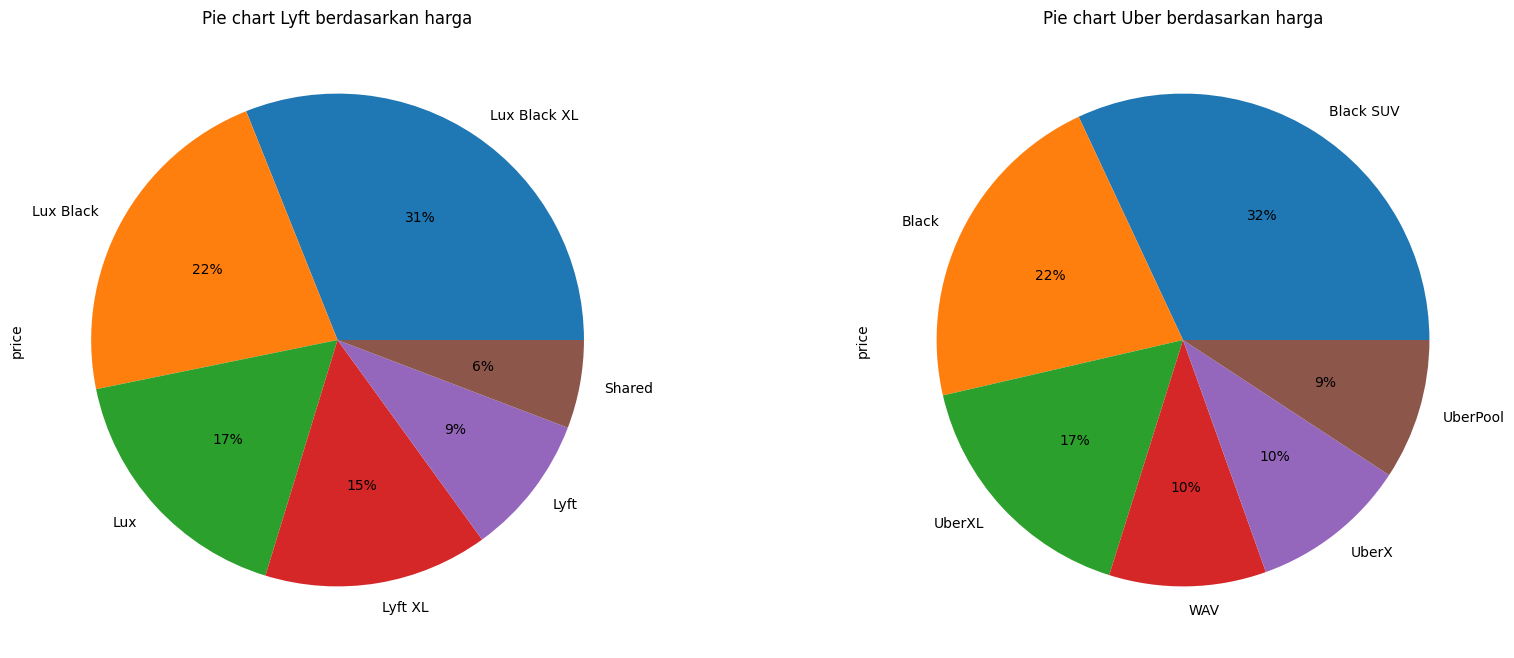

In [ ]:
#Mengelompokkan data berdasarkan jenis cab_type dan name, kemudian menghitung total harga
df_area = df.groupby(['cab_type', 'name']).sum()['price'].sort_values(ascending = False)

#Membuat subplots
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(20, 8))

#Membuat pie chart untuk jenis cab_type 'Lyft'
df_lyft = df_area['Lyft']
df_lyft.plot(kind = 'pie', ax = ax[0], autopct = '%1.0f%%')
ax[0].set_title('Pie chart Lyft berdasarkan harga')

#Membuat pie chart untuk jenis cab_type 'Uber'
df_uber = df_area['Uber']
df_uber.plot(kind = 'pie', ax = ax[1], autopct = '%1.0f%%')
ax[1].set_title('Pie chart Uber berdasarkan harga')

#Menampilkan plot
plt.show()

- Dari **pie chart Lyft berdasarkan harga** yang terdapat disebelah kiri tersebut dapat dilihat bahwa untuk name atau jenis Lyft yang paling besar total harganya adalah Lux Black XL dengan presentase 31% yang disusul oleh Lux Black dengan presentase 22%. Sedangkan yang paling sedikit total harganya adalah Shared dengan presentase 6%.

- Dari **pie chart Uber berdasarkan harga** yang terdapat disebelah kiri tersebut dapat dilihat bahwa untuk name atau jenis Uber yang paling besar total harganya adalah Black SUV dengan presentase 28% yang disusul oleh Black dengan presentase 19%. Sedangkan yang paling sedikit total harganya adalah UberPool dengan presentase 8%.

- Sehingga, bila digabungkan dari kedua pie chart tersebut, Lux Black memiliki total harga yang paling besar disemua name pada cab_type, dan Shared adalah yang terkecil.

In [ ]:
#Mengecek statistik deskriptif dari masing-masing atribut yang bertipe object
df.describe(include='O')

,id,datetime,timezone,source,destination,cab_type,product_id,name,short_summary,long_summary,icon
count,637976,637976,637976,637976,637976,637976,637976,637976,637976,637976,637976
unique,637976,31350,1,12,12,2,12,12,9,11,7
top,424553bb-7174-41ea-aeb4-fe06d4f4b9d7,2018-11-26 23:33:14,America/New_York,Financial District,Financial District,Uber,6f72dfc5-27f1-42e8-84db-ccc7a75f6969,UberXL,Overcast,Mostly cloudy throughout the day.,cloudy
freq,1,151,637976,54197,54192,330568,55096,55096,201429,186262,201429


Karena kolomnya sangat banyak, jadinya perlu diambil kolom mana yang paling berpengaruh terhadap price. Untuk itu, dilakukanlah pencarian korelasi :

In [ ]:
#Melakukan pencarian korelasi
dfcorr = df.corr()
dfcorr

<ipython-input-26-be957b5f04f7>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  dfcorr = df.corr()


,timestamp,hour,day,month,price,distance,surge_multiplier,latitude,longitude,temperature,apparentTemperature,precipIntensity,precipProbability,humidity,windSpeed,windGust,windGustTime,visibility,temperatureHigh,temperatureHighTime,temperatureLow,temperatureLowTime,apparentTemperatureHigh,apparentTemperatureHighTime,apparentTemperatureLow,apparentTemperatureLowTime,dewPoint,pressure,windBearing,cloudCover,uvIndex,visibility.1,ozone,sunriseTime,sunsetTime,moonPhase,precipIntensityMax,uvIndexTime,temperatureMin,temperatureMinTime,temperatureMax,temperatureMaxTime,apparentTemperatureMin,apparentTemperatureMinTime,apparentTemperatureMax,apparentTemperatureMaxTime
timestamp,1.000000,-0.028501,-0.341420,0.771245,0.000808,0.003290,0.000611,0.168295,-0.136716,-0.249027,-0.226472,-0.179834,-0.147351,-0.167740,-0.066364,0.005565,0.998843,0.158577,-0.228324,0.999332,-0.366885,0.999175,-0.215550,0.999312,-0.402043,0.999204,-0.265512,0.533074,-0.133853,-0.081522,-0.025986,0.158577,0.196566,0.999372,0.999372,-0.846279,-0.211887,0.999364,-0.307194,0.998195,-0.186495,0.999290,-0.378538,0.998288,-0.157891,0.999276
hour,-0.028501,1.000000,0.066223,-0.079734,0.000561,0.002283,-0.000067,0.019228,-0.005986,0.218829,0.198212,-0.233246,-0.129631,-0.275778,0.073011,0.077646,-0.028544,0.173776,0.005191,-0.028323,0.015000,-0.027267,0.005518,-0.028481,0.015722,-0.027438,0.004863,-0.067787,0.036292,0.026680,0.330326,0.173776,0.034035,-0.028016,-0.028014,0.020997,0.020288,-0.027997,0.015668,-0.027486,0.002982,-0.028479,0.015882,-0.028172,0.002904,-0.028273
day,-0.341420,0.066223,1.000000,-0.861325,-0.000722,-0.000992,0.001397,0.006744,0.078539,-0.083934,-0.223410,0.091513,0.030765,-0.093376,0.440512,0.402611,-0.336560,0.105210,-0.283410,-0.343251,-0.088370,-0.333686,-0.398099,-0.343422,-0.192984,-0.335630,-0.101470,-0.444738,0.092226,-0.041103,-0.012083,0.105210,0.376791,-0.341201,-0.341145,-0.007038,0.145789,-0.341330,0.038089,-0.334118,-0.304704,-0.344669,-0.019878,-0.335176,-0.444366,-0.344546
month,0.771245,-0.079734,-0.861325,1.000000,0.000913,0.002402,-0.000612,0.085946,-0.126763,-0.082048,0.024773,-0.154356,-0.097803,-0.022078,-0.334897,-0.270541,0.767339,0.011129,0.068094,0.772119,-0.138703,0.765551,0.152479,0.772227,-0.087019,0.766883,-0.074906,0.589683,-0.135317,-0.016767,-0.012340,0.011129,-0.149111,0.770749,0.770712,-0.452655,-0.213301,0.770832,-0.191928,0.765319,0.105113,0.773057,-0.191293,0.766097,0.214928,0.772962
price,0.000808,0.000561,-0.000722,0.000913,1.000000,0.345061,0.240458,0.002088,-0.001417,-0.000084,-0.000193,0.000166,-0.000243,-0.001238,0.000990,0.001218,0.000851,0.001497,-0.000516,0.000759,0.000182,0.000754,-0.000261,0.000741,0.000831,0.000761,-0.000615,0.000866,-0.001382,0.000883,-0.000424,0.001497,0.000460,0.000760,0.000760,-0.001602,0.001114,0.000763,-0.000428,0.000769,-0.000550,0.000766,-0.000580,0.000814,-0.000290,0.000746
distance,0.003290,0.002283,-0.000992,0.002402,0.345061,1.000000,0.025946,0.000984,-0.000415,-0.002738,-0.002835,-0.000512,0.000134,-0.003849,0.001709,0.000920,0.003371,0.004143,-0.003795,0.003338,-0.001744,0.003282,-0.003699,0.003317,-0.001006,0.003311,-0.003920,0.003565,-0.002638,-0.000958,0.002422,0.004143,0.001206,0.003291,0.003291,-0.004301,0.000670,0.003298,-0.003192,0.003166,-0.003875,0.003318,-0.003649,0.003266,-0.003889,0.003319
surge_multiplier,0.000611,-0.000067,0.001397,-0.000612,0.240458,0.025946,1.000000,0.001471,-0.001961,-0.001594,-0.002586,-0.001522,-0.002825,-0.001677,0.002593,0.002162,0.000477,0.001716,-0.001943,0.000560,-0.002669,0.000614,-0.002098,0.000559,-0.003088,0.000592,-0.001860,-0.003109,0.002171,-0.002101,-0.002567,0.001716,0.003456,0.000585,0.000585,-0.000163,-0.000090,0.000585,-0.000716,0.000594,-0.001998,0.000563,-0.001317,0.000502,-0.002214,0.000559
latitude,0.168295,0.019228,0.006744,0.085946,0.002088,0.000984,0.001471,1.000000,-0.531443,-0.098909,-0.067427,-0.074306,-0.071331,-0.117721,-0.097125,0.024346,0.172786,0.124286,-0.115623,0.173857,-0.032005,0.171345,-0.092459,0

<Axes: >

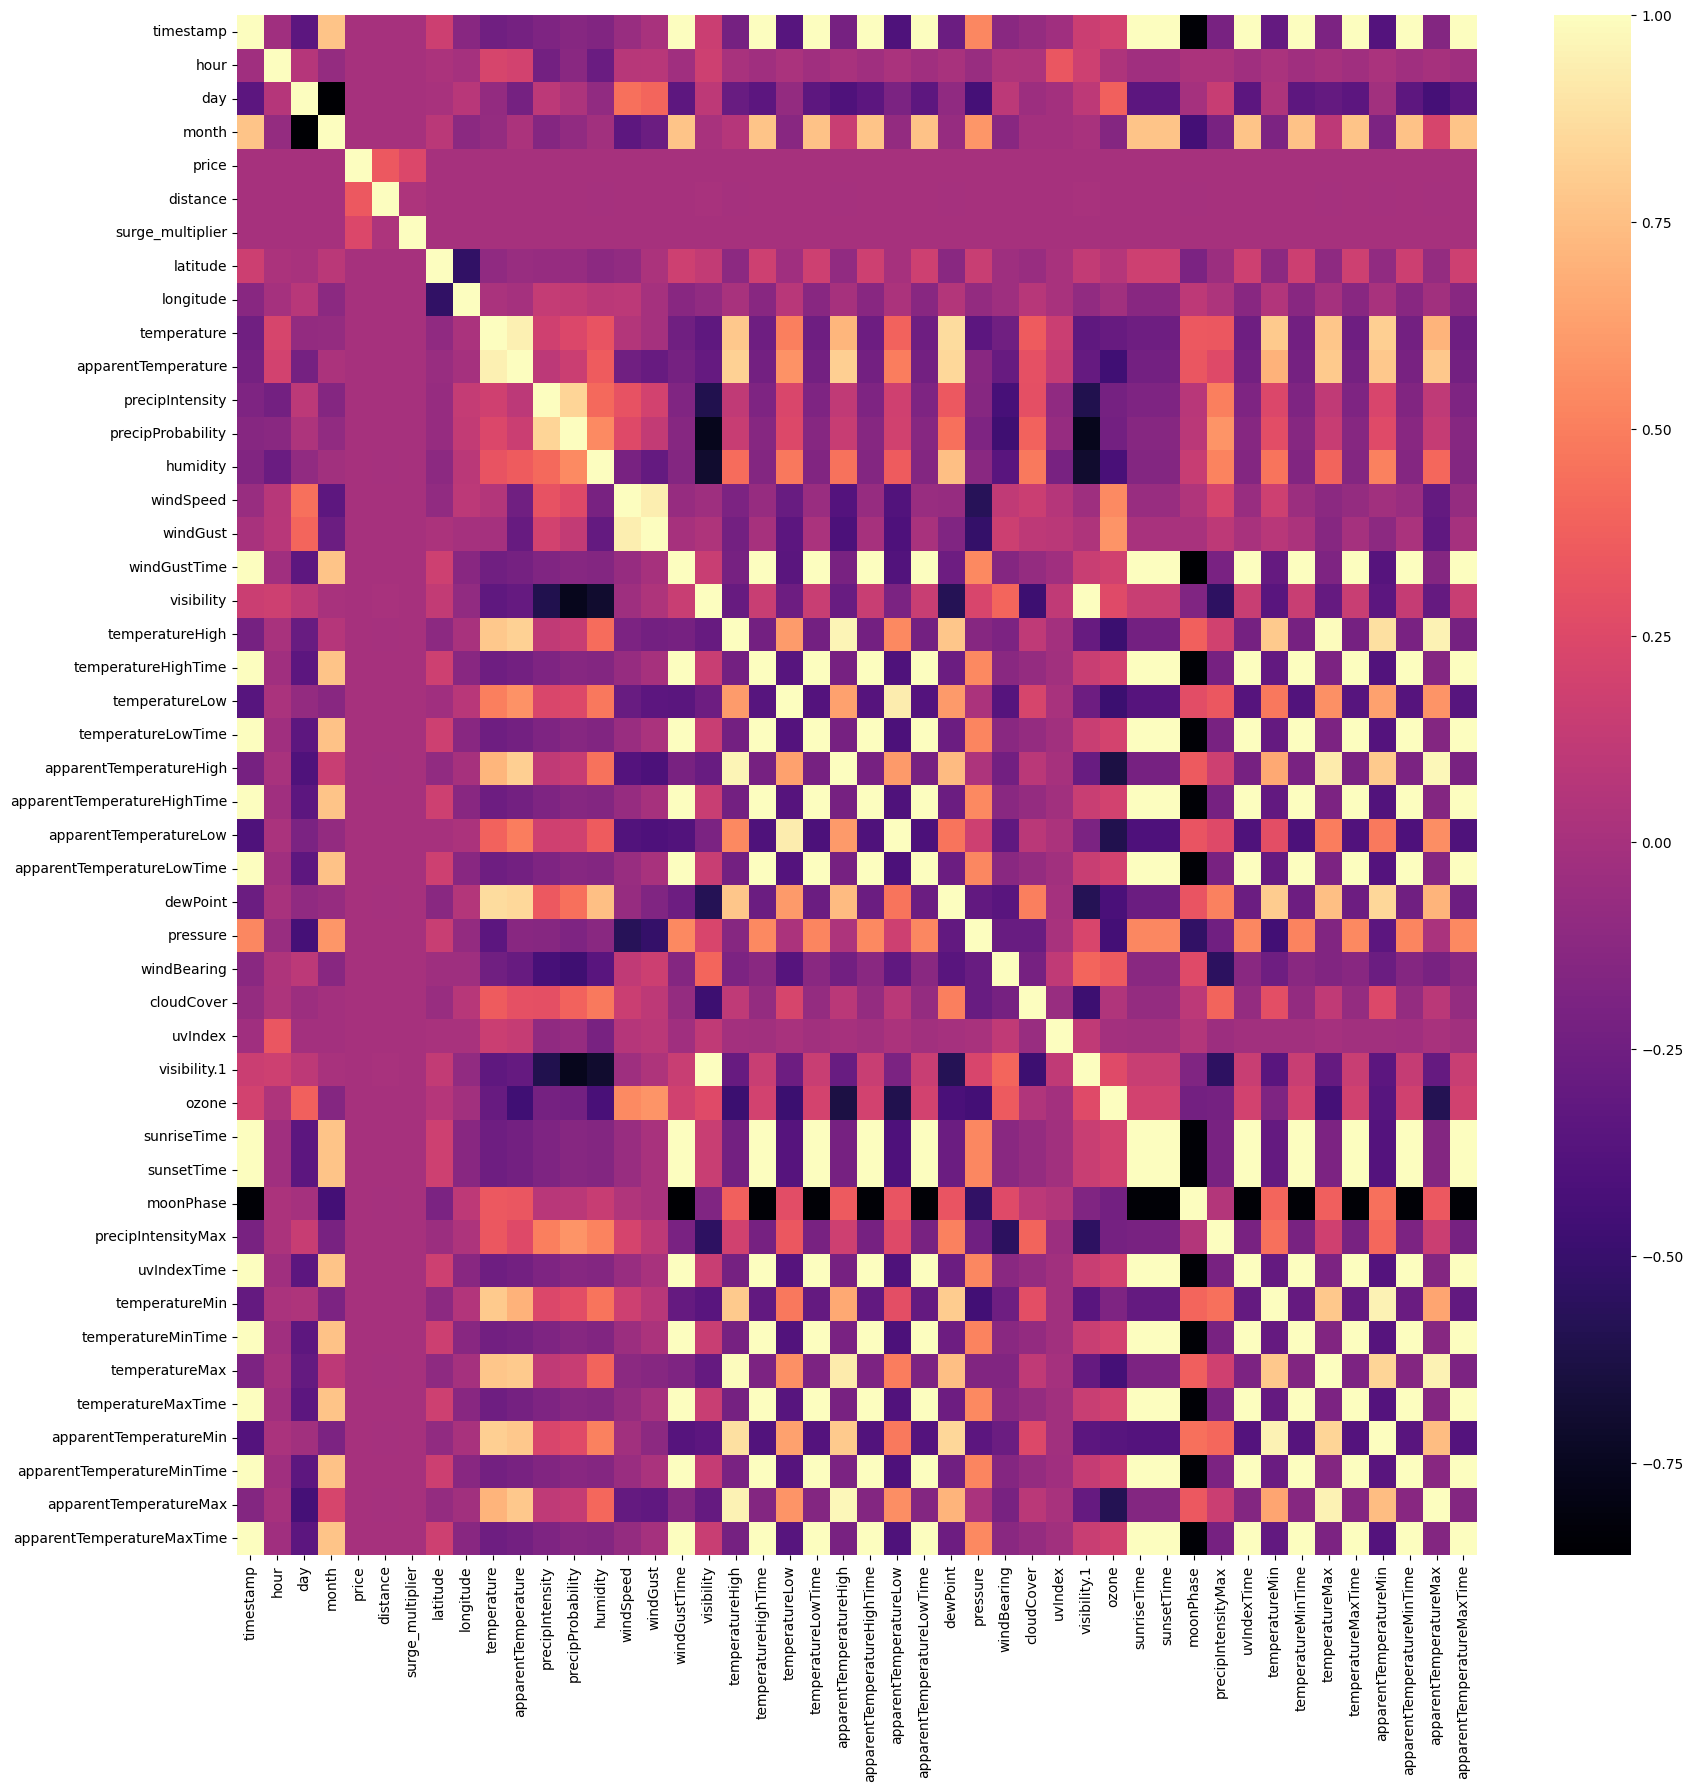

In [ ]:
#Visualisasi Korelasi
plt.figure(figsize=(20, 20))
sns.heatmap(dfcorr, cmap='magma')

Tahap berikutnya menyeleksi kolom yang ingin digunakan dengan acuan nilai korelasinya lebih dari sama dengan 0,001 dan kurang dari sama dengan 0,001 terhadap price. Alasannya adalah semakin nilai dari kolom tersebut mendekati 0 menunjukkan tidak ada korelasi atau hubungan linier antara dua variabel tersebut.

In [ ]:
#Menentukan nilai korelasi dengan range diatas sama dengan 0.001 dan dibawah sama dengan -0.001 terhadap price
dfcorr2 = dfcorr[(dfcorr['price'] >= 0.001) | (dfcorr['price'] <= -0.001)]
dfcorr2['price']

price                 1.000000
distance              0.345061
surge_multiplier      0.240458
latitude              0.002088
longitude            -0.001417
humidity             -0.001238
windGust              0.001218
visibility            0.001497
windBearing          -0.001382
visibility.1          0.001497
moonPhase            -0.001602
precipIntensityMax    0.001114
Name: price, dtype: float64

Sesuai hasil diatas maka akan diambil atribut-atribut berikut:

distance, surge_multiplier, price, visibility, humidity, dan windGust. Selain itu ditambah pula beberapa atribut bertipe objek seperti cab_type dan product_id.

In [ ]:
df_fix = df[['distance', 'surge_multiplier', 'price', 'cab_type', 'visibility', 'product_id', 'humidity', 'windGust']]
df_fix.head(5)

,distance,surge_multiplier,price,cab_type,visibility,product_id,humidity,windGust
0,0.44,1.0,5.0,Lyft,10.000,lyft_line,0.68,9.17
1,0.44,1.0,11.0,Lyft,4.786,lyft_premier,0.94,11.98
2,0.44,1.0,7.0,Lyft,10.000,lyft,0.75,7.33
3,0.44,1.0,26.0,Lyft,10.000,lyft_luxsuv,0.73,5.28
4,0.44,1.0,9.0,Lyft,10.000,lyft_plus,0.70,9.14


Alasan kami memilih kolom tersebut karena harga ditentukan berdasarkan beberapa faktor : 

* *distance* : harga dipegaruhi juga oleh jarak yag ditempuh.
* *surge_multiplier* : berfungsi sebagai mekanisme untuk menyeimbangkan permintaan dan penawaran dalam platform *ride-sharing*.
* *cab_type* : jenis dari trasortasi umum yag digunakan.
* *visibility, humidity, windGust* : hal ini bedasarkan dari cuaca.
* *product_id* : jenis layanan yang disediakan oleh transportasi umum (Uber dan Lyft)

<ipython-input-30-60ad8e718c7c>:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df_fix.corr(), annot=True, cmap='coolwarm')


<Axes: title={'center': 'Korelasi Heatmap dari Dataframe baru'}>

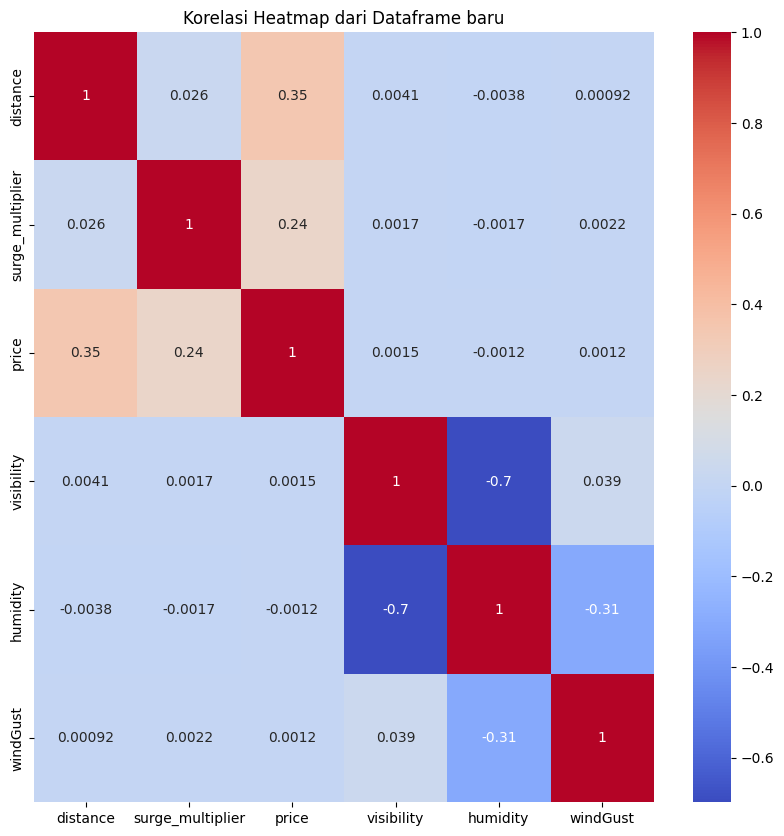

In [ ]:
plt.figure(figsize=(10, 10))
plt.title('Korelasi Heatmap dari Dataframe baru')
sns.heatmap(df_fix.corr(), annot=True, cmap='coolwarm')

---
##**Data Preprocessing**
---

In [ ]:
#Melakukan encoding dengan One Hot Encoder pada atribut yang memiliki tipe data Object.
def one_hot_encoder(df_fix, feature, keep_first = True):
    one_hot_cols = pd.get_dummies(df_fix[feature])
    for col in one_hot_cols.columns:
        one_hot_cols.rename({col:f'{feature}_'+col}, axis=1, inplace=True)
    
    new_df = pd.concat([df_fix ,one_hot_cols],axis=1)
    new_df.drop(feature,axis=1,inplace=True)
    
    if keep_first == False:
        new_df=new_df.iloc[:,1:]
    
    return new_df

df_copy = df_fix.copy()
for col in df_copy.select_dtypes(include='O').columns:
    df_copy=one_hot_encoder(df_copy,col)

df_copy.head()

,distance,surge_multiplier,price,visibility,humidity,windGust,cab_type_Lyft,cab_type_Uber,product_id_55c66225-fbe7-4fd5-9072-eab1ece5e23e,product_id_6c84fd89-3f11-4782-9b50-97c468b19529,product_id_6d318bcc-22a3-4af6-bddd-b409bfce1546,product_id_6f72dfc5-27f1-42e8-84db-ccc7a75f6969,product_id_997acbb5-e102-41e1-b155-9df7de0a73f2,product_id_9a0e7b09-b92b-4c41-9779-2ad22b4d779d,product_id_lyft,product_id_lyft_line,product_id_lyft_lux,product_id_lyft_luxsuv,product_id_lyft_plus,product_id_lyft_premier
0,0.44,1.0,5.0,10.000,0.68,9.17,1,0,0,0,0,0,0,0,0,1,0,0,0,0
1,0.44,1.0,11.0,4.786,0.94,11.98,1,0,0,0,0,0,0,0,0,0,0,0,0,1
2,0.44,1.0,7.0,10.000,0.75,7.33,1,0,0,0,0,0,0,0,1,0,0,0,0,0
3,0.44,1.0,26.0,10.000,0.73,5.28,1,0,0,0,0,0,0,0,0,0,0,1,0,0
4,0.44,1.0,9.0,10.000,0.70,9.14,1,0,0,0,0,0,0,0,0,0,0,0,1,0


In [ ]:
#Inisialisasi X dan y
X = df_copy.drop(columns=['price'])
y = df_copy['price']
display(X.head(3))
print("Dimensi X adalah : ", X.shape)
display(y.head(3))
print("Dimensi y adalah : ", y.shape)

,distance,surge_multiplier,visibility,humidity,windGust,cab_type_Lyft,cab_type_Uber,product_id_55c66225-fbe7-4fd5-9072-eab1ece5e23e,product_id_6c84fd89-3f11-4782-9b50-97c468b19529,product_id_6d318bcc-22a3-4af6-bddd-b409bfce1546,product_id_6f72dfc5-27f1-42e8-84db-ccc7a75f6969,product_id_997acbb5-e102-41e1-b155-9df7de0a73f2,product_id_9a0e7b09-b92b-4c41-9779-2ad22b4d779d,product_id_lyft,product_id_lyft_line,product_id_lyft_lux,product_id_lyft_luxsuv,product_id_lyft_plus,product_id_lyft_premier
0,0.44,1.0,10.000,0.68,9.17,1,0,0,0,0,0,0,0,0,1,0,0,0,0
1,0.44,1.0,4.786,0.94,11.98,1,0,0,0,0,0,0,0,0,0,0,0,0,1
2,0.44,1.0,10.000,0.75,7.33,1,0,0,0,0,0,0,0,1,0,0,0,0,0


Dimensi X adalah :  (637976, 19)


0     5.0
1    11.0
2     7.0
Name: price, dtype: float64

Dimensi y adalah :  (637976,)


In [ ]:
#Membagi data menjadi Training (80%) dan Testing (20%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

In [ ]:
print(X_train.shape)
print(X_test.shape)

(510380, 19)
(127596, 19)


Berdasarkan pembagian proporsi *data training*/data latih dan *data testing*/data uji, didapatkan jumlah *data training* dari keseluruhan data sebanyak 554456 data, serta *data testing* sebanyak 138615 data.

##**Pendefinisian Model**

In [ ]:
#Membuat model regresi linier
model = LinearRegression()

# Melatih model dengan data latih
model.fit(X_train, y_train)

LinearRegression()

Alasan menggunakan model regresi linear karena tujuan akhir dari projek ini. Tujuan projek ini yaitu memprediksi berapa harga dari lyft atau uber berdasarkan nilai distance, surge multplier, cab_type, windgust, humidity, product_id, dan visibility. Regresi linear merupakan algoritma machine learning yang sangat cocok untuk data yang tipikalnya continu.

In [ ]:
#Mengakses koefisien (coeficients) dari model regresi linier
print('Intercept:', model.intercept_)

#Mengakses nilai intercept (bias) dari model regresi linear yang telah di-fitkan
print('\nCoefficients: ', model.coef_)

#Mencetak koefisien determinasi
print('\nCoefficient of Determination: ', model.score(X_test, y_test))

Intercept: -8.091675889400715

Coefficients:  [ 2.79568147e+00  1.83232390e+01 -3.30337223e-03 -6.48458481e-02
  1.42110474e-03  4.25035561e-01 -4.25035561e-01 -6.09701586e+00
  4.65123380e+00  1.44143079e+01 -1.84462375e-01 -7.10983014e+00
 -6.09926886e+00 -7.79841670e+00 -1.06781088e+01  5.67612963e+00
  1.49304304e+01 -2.09061296e+00  3.85614077e-01]

Coefficient of Determination:  0.9273917372810518


##**Training Model**

In [ ]:
# Melakukan prediksi dengan data uji
y_pred = model.predict(X_test)

##**Model Evaluation**

In [ ]:
print('Predicted Response: ', y_pred, sep='\n')

mse = mean_squared_error(y_pred, y_test)
print('\nMSE :', mse)

mae = mean_absolute_error(y_test, y_pred)
print("MAE :", mae)

rmse = np.sqrt(mse)
print('RMSE :', rmse)

r2 = r2_score(y_test, y_pred)
print('Linear Regression R squared :', r2)

Predicted Response: 
[12.50521375 11.48162774  5.83755866 ... 18.58966287  8.13787775
 11.66084978]

MSE : 6.330019027965331
MAE : 1.7769935490073623
RMSE : 2.5159529065476027
Linear Regression R squared : 0.9273917372810518


Setelah mendapat hasil performa model, hal ini harus dibuktikan dengan visualisasi tren performa. Dibawah ini merupakan visualisasi dengan x axis yaitu atribut **distance** karena memiliki korelasi tinggi dengan y (atribut Harga)

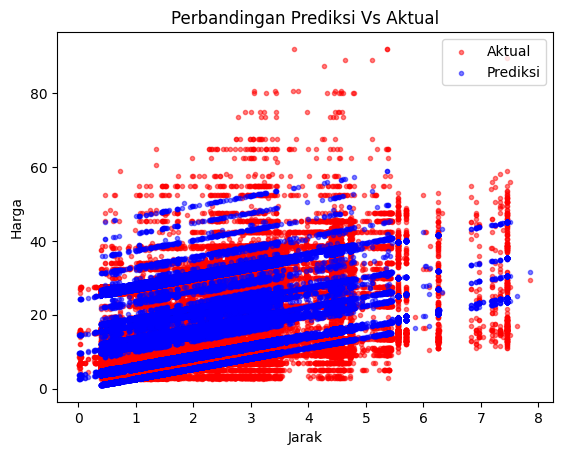

In [ ]:
x_axis = X_test.distance

plt.scatter(x_axis, y_test, c = 'r', alpha = 0.5, marker = '.', label = 'Aktual')
plt.scatter(x_axis, y_pred, c = 'b', alpha = 0.5, marker = '.', label = 'Prediksi')
plt.xlabel('Jarak')
plt.ylabel('Harga') 
plt.title("Perbandingan Prediksi Vs Aktual")
plt.legend(loc = 'upper right')
plt.show()

Dapat dilihat bahwa hasil dari Linear Regression ini memiliki akurasi atau skor 91,81% dan nilai RMSE 2.568

In [ ]:
train = pd.DataFrame(y_train[:10])
train['predict train'] = y_train[:10]
train['difference']= train['price'] - train['predict train']
train

,price,predict train,difference
141913,9.0,9.0,0.0
207434,32.5,32.5,0.0
524847,28.5,28.5,0.0
629294,11.0,11.0,0.0
5225,10.5,10.5,0.0
641861,7.5,7.5,0.0
273966,27.5,27.5,0.0
330111,30.0,30.0,0.0
548958,16.5,16.5,0.0
143180,11.0,11.0,0.0


In [ ]:
test = pd.DataFrame(y_test[:10])
test['predict test'] = y_test[:10]
test['difference'] = test['price'] - test['predict test']
test

,price,predict test,difference
526491,7.0,7.0,0.0
506474,10.5,10.5,0.0
139551,7.0,7.0,0.0
235222,15.5,15.5,0.0
140436,16.5,16.5,0.0
62314,15.0,15.0,0.0
192444,19.5,19.5,0.0
309129,11.0,11.0,0.0
33575,11.0,11.0,0.0
87489,28.5,28.5,0.0


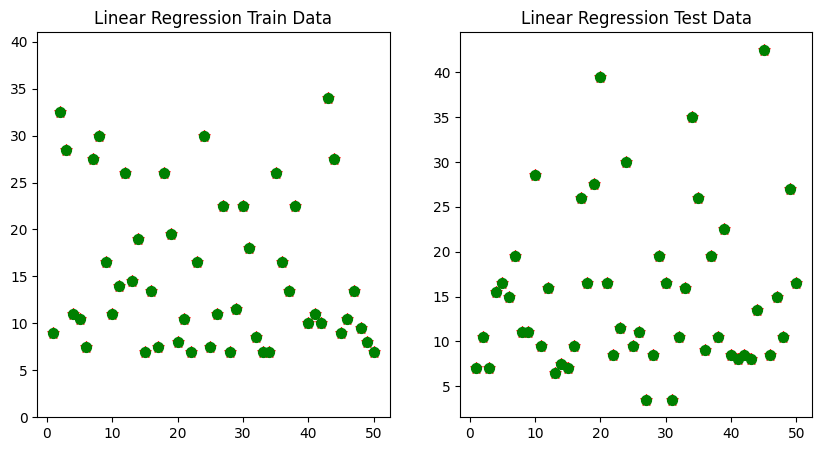

In [ ]:
#Membuat dua subplot dalam satu figure
fig, (ax1,ax2)=plt.subplots(1,2, figsize=(10,5))

#Plot pertama
ax1.scatter(x = range(1,51), y = y_train[:50], marker = '*', c ='r', s=70, label=['y_test'])
ax1.scatter(x = range(1,51), y = y_train[:50], marker = 'o', c ='g', s=50, label=['y_pred'])
ax1.set_title('Linear Regression Train Data')
ax1.set_ylim([0,41])

#Plot kedua
ax2.scatter(x = range(1,51), y = y_test[:50], marker='*', c='r', s=70, label=['y_test'])
ax2.scatter(x = range(1,51), y = y_test[:50], marker='o', c='g', s=50, label=['y_pred'])
ax2.set_title('Linear Regression Test Data')

#Menampilkan plot
plt.show()

##**Model Inference**

In [ ]:
X_to_test = df_fix.copy()

In [ ]:
X_to_test.head()

,distance,surge_multiplier,price,cab_type,visibility,product_id,humidity,windGust
0,0.44,1.0,5.0,Lyft,10.000,lyft_line,0.68,9.17
1,0.44,1.0,11.0,Lyft,4.786,lyft_premier,0.94,11.98
2,0.44,1.0,7.0,Lyft,10.000,lyft,0.75,7.33
3,0.44,1.0,26.0,Lyft,10.000,lyft_luxsuv,0.73,5.28
4,0.44,1.0,9.0,Lyft,10.000,lyft_plus,0.70,9.14


In [ ]:
distance = float(input('distance : '))
productID = input('product ID : ')
cabType = input("Cab type : ")
surgeMultiplier = float(input('surge multiplier : '))
visibility = float(input('visibility : '))
humidity = float(input('humidity : '))
windGust = float(input('windGust : '))

distance : 0.5
product ID : lyft_premier
Cab type : Lyft
surge multiplier : 1
visibility : 10.000
humidity : 0.68
windGust : 9.17


In [ ]:
to_inference = {'distance' : [distance],
                'product_id' : [productID],
                'cab_type' : [cabType],
                'surge_multiplier' : [surgeMultiplier],
                'visibility' : [visibility],
                'humidity' : [humidity],
                'windGust' : [windGust]}

In [ ]:
pd.DataFrame(to_inference)

,distance,product_id,cab_type,surge_multiplier,visibility,humidity,windGust
0,0.5,lyft_premier,Lyft,1.0,10.0,0.68,9.17


In [ ]:
X_to_test = pd.concat([X_to_test, pd.DataFrame(to_inference)], ignore_index = True)

In [ ]:
X_to_test = pd.get_dummies(X_to_test)
X_to_test = X_to_test[-1:]
X_to_test

,distance,surge_multiplier,price,visibility,humidity,windGust,cab_type_Lyft,cab_type_Uber,product_id_55c66225-fbe7-4fd5-9072-eab1ece5e23e,product_id_6c84fd89-3f11-4782-9b50-97c468b19529,product_id_6d318bcc-22a3-4af6-bddd-b409bfce1546,product_id_6f72dfc5-27f1-42e8-84db-ccc7a75f6969,product_id_997acbb5-e102-41e1-b155-9df7de0a73f2,product_id_9a0e7b09-b92b-4c41-9779-2ad22b4d779d,product_id_lyft,product_id_lyft_line,product_id_lyft_lux,product_id_lyft_luxsuv,product_id_lyft_plus,product_id_lyft_premier
637976,0.5,1.0,NaN,10.0,0.68,9.17,1,0,0,0,0,0,0,0,0,0,0,0,0,1


In [ ]:
X_to_test = X_to_test.drop(columns = 'price')

In [ ]:
price = model.predict(X_to_test)

In [ ]:
price

array([12.37595614])

##**Kesimpulan**

kegiatan yang dilakukan :

1. terdapat 693071 baris dan 57 kolom data dari data set yang didapat dari kaggle.
2. data yang diperoleh tidak terlalu bersih sehingga dilakukan cleaning data.
3. setelah melakukan cleaning data tersisa 637976 baris. 
4. dilakukan explorasi data untuk melihat tabel dan hubungan antar kolom.
5. menentukan kolom yang akan digunakan. dengan menggunakan tabel heatmap kita mengambil keputusan dengan menggunakan kolom yang memiliki korelasi atau hubungan dengan kolom price dengan nilai diatas 0.001 dan dibawah -0.001.
6. dalam pemilihan kolom tidak dilakukan dengan sembarang. kami memperkirakan faktor yang dapat mempengaruhi kolom price. seperti menambahkan kolom Product_ID sebagai kolom yang digunakan.
7. kolom yang kami gunakan : price, distance, product_id, cab_type, surge_multiplier, visibility, humidity, windGust.


###Kesimpulan :

1. Tingkat akurasi dari penilitian ini menggunakan linear regresi adalah sebesar 92% (0.9273917372810518) dan absolute error 1.7769935490073623.
2. model ini dapat digunakan untuk melihat perbandingan harga uber dan lyft pada kondisi tertentu dan jarak tertentu.
3. uber cenderung menawarkan harga yang lebih murah dibandingkan lyft.